
# NETFLIX stock analysis

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [7]:
nf = pd.read_csv('Netflix.csv')
nf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [8]:
nf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


In [13]:
nf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [15]:
sns.set(rc = {'figure.figsize' : (10,5)})

In [23]:
nf['Date'] = pd.to_datetime(nf['Date'])
nf = nf.set_index('Date')
nf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'volume of stocks v/s time')

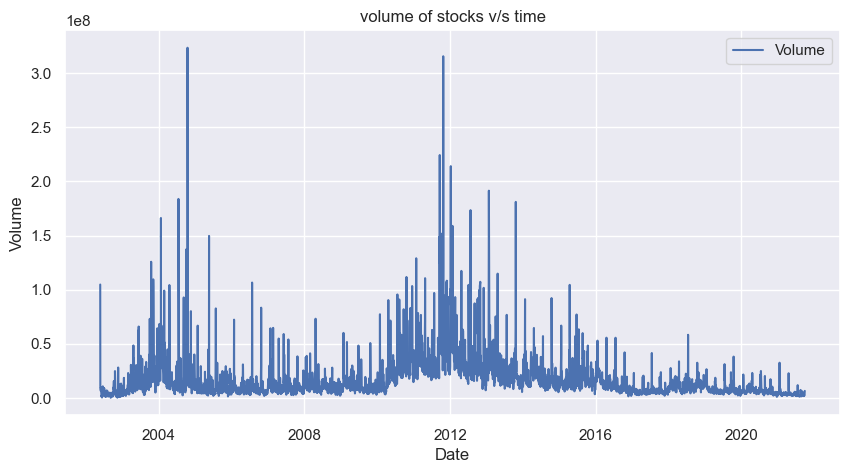

In [27]:
sns.lineplot(x = nf.index, y = nf['Volume'], label = 'Volume')
plt.title('volume of stocks v/s time')

<Axes: title={'center': 'Netflix stock Price'}, xlabel='Date'>

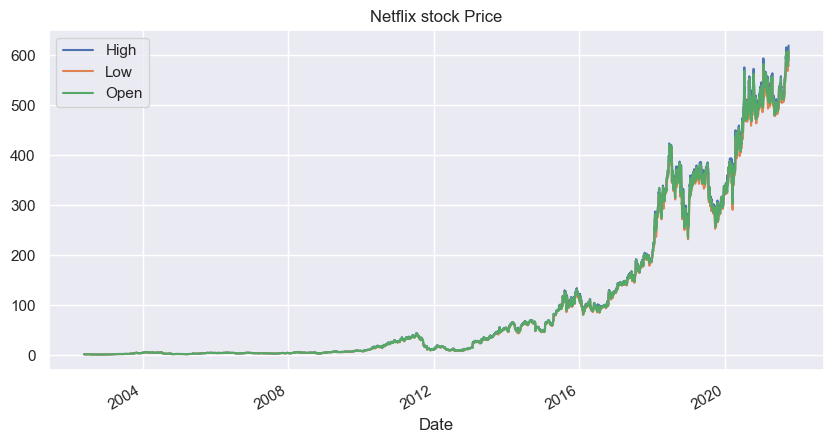

In [31]:
nf.plot(y = ['High','Low','Open'], title = "Netflix stock Price")

# three graphs together with different date,year,month

<Axes: xlabel='Year'>

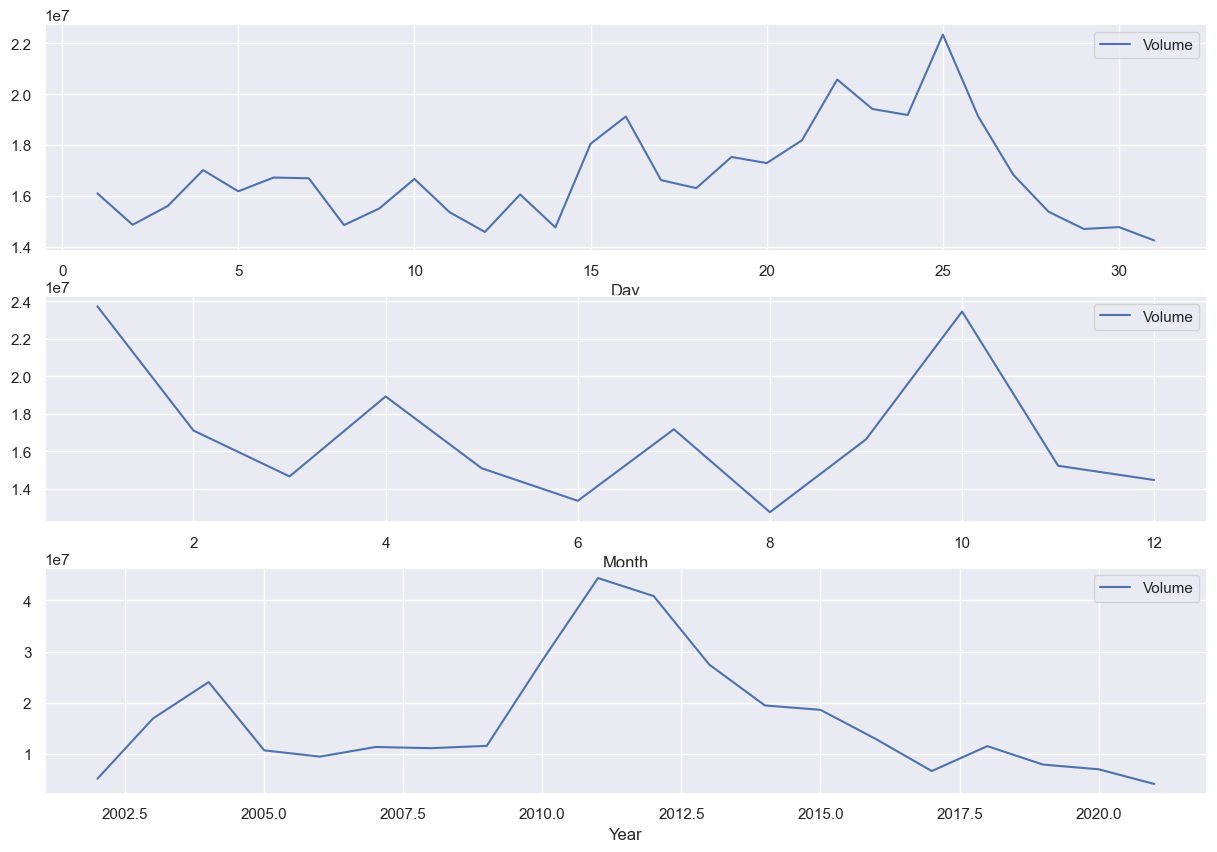

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize =(15,10))
nf.groupby(nf.index.day).mean().plot(y = 'Volume', ax = ax1, xlabel = 'Day')
nf.groupby(nf.index.month).mean().plot(y = 'Volume',ax = ax2, xlabel= 'Month')
nf.groupby(nf.index.year).mean().plot(y = 'Volume',ax = ax3, xlabel = 'Year')

# dates with highest stock price

In [43]:
a = nf.sort_values(by = 'High', ascending = False).head(5)
a['High']


Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64

# date with lowest stock values

In [45]:
b = nf.sort_values(by = 'Low', ascending = True).head(5)
b['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

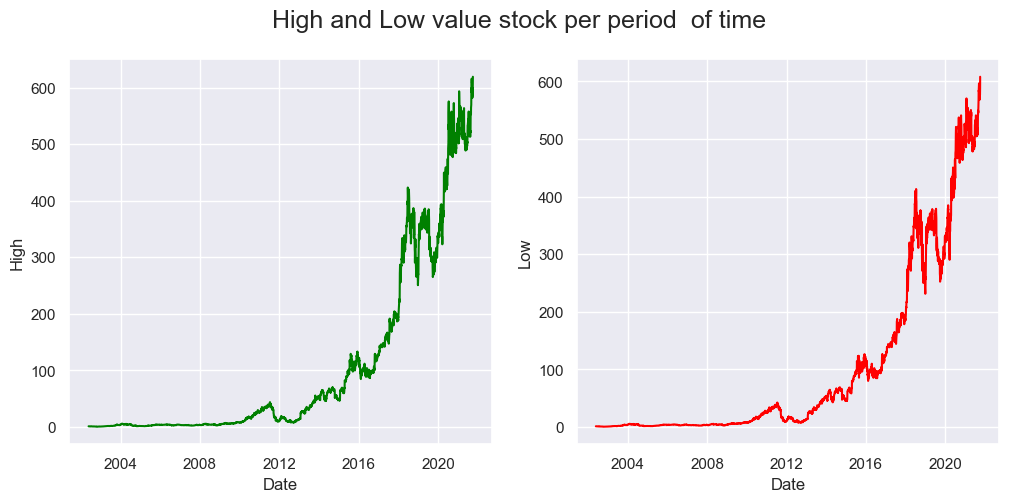

In [57]:
fig,axes = plt.subplots(nrows =1,ncols =2,sharex = True, figsize = (12,5))
fig.suptitle("High and Low value stock per period  of time", fontsize = 18)
sns.lineplot(ax = axes[0], y = nf['High'],x = nf.index, color = 'green')
sns.lineplot(ax = axes[1], y = nf['Low'],x = nf.index, color = 'red')
